# Data Analysis in Geoscience Remote Sensing Projects: Exercises 
## Solutions to tasks: Machine learning for classification

Hendrik Andersen | contact: hendrik.andersen@kit.edu

### Task 1

In [5]:
from sklearn.datasets import load_breast_cancer
import numpy as np
import matplotlib.pyplot as plt

data = load_breast_cancer(as_frame=True) # let us first load the data
X = data.data # These are the predictive features
y = data.target # This is the target information (malignant: 0, or benign: 1)

# first we split up the data in training and test as usual 
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = 0.2, random_state = 0)

# we define the classifier to be a logistic regression 
from sklearn.linear_model import LogisticRegression
clf = LogisticRegression(random_state = 0)
clf.fit(X_train, y_train) # ... and fit the model on the training data
y_pred = clf.predict(X_test) # we can make predictions on the test data

# To analyse the performance we can use a confusion matrix (see lecture slides)
from sklearn.metrics import confusion_matrix, ConfusionMatrixDisplay
CM = confusion_matrix(y_test, y_pred)
CM

C:\Users\sudur\miniconda3\envs\Python\Lib\site-packages\sklearn\utils\validation.py:767: FutureWarning: is_sparse is deprecated and will be removed in a future version. Check `isinstance(dtype, pd.SparseDtype)` instead.
  if not hasattr(array, "sparse") and array.dtypes.apply(is_sparse).any():
C:\Users\sudur\miniconda3\envs\Python\Lib\site-packages\sklearn\utils\validation.py:605: FutureWarning: is_sparse is deprecated and will be removed in a future version. Check `isinstance(dtype, pd.SparseDtype)` instead.
  if is_sparse(pd_dtype):
C:\Users\sudur\miniconda3\envs\Python\Lib\site-packages\sklearn\utils\validation.py:614: FutureWarning: is_sparse is deprecated and will be removed in a future version. Check `isinstance(dtype, pd.SparseDtype)` instead.
  if is_sparse(pd_dtype) or not is_extension_array_dtype(pd_dtype):
C:\Users\sudur\miniconda3\envs\Python\Lib\site-packages\sklearn\utils\validation.py:605: FutureWarning: is_sparse is deprecated and will be removed in a future version. Ch

array([[45,  2],
       [ 4, 63]], dtype=int64)

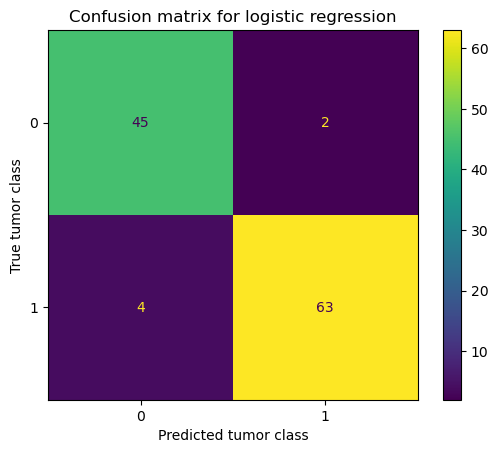

In [6]:
# we can also plot the confusion matrix using the function ConfusionMatrixDisplay 
disp = ConfusionMatrixDisplay(CM)
disp.plot()
plt.xlabel("Predicted tumor class")
plt.ylabel("True tumor class")
plt.title("Confusion matrix for logistic regression")
plt.show()

In [4]:
# From the confusion matrix, we can directly extract the information on the classification results and compute performance metrics of the classifier 

TN = CM[0][0] # True negative
FN = CM[1][0] # False negative
TP = CM[1][1] # True positive
FP = CM[0][1] # False positive

## We discussed these metrics of the confusion matrix in the lecture
# Probability of detection, also: sensitivity, hit rate, recall, or true positive rate
POD = TP/(TP+FN)
# Overall accuracy, also percent correct (multiply by 100 to convert to %)
ACC = (TP+TN)/(TP+FP+FN+TN)
# False alarm rate
FAR = FP/(TP+FP)
# Bias score
BS = (TP+FP)/(TP+FN)

## some additional metrics
# Specificity or true negative rate
TNR = TN/(TN+FP) 
# Precision or positive predictive value
PPV = TP/(TP+FP)
# Negative predictive value
NPV = TN/(TN+FN)
# Fall out or false positive rate
FPR = FP/(FP+TN)
# False negative rate
FNR = FN/(TP+FN)

print("Probability of detection: ", round(POD,3))
print("Overall accuracy: ", round(ACC,3))
print("False alarm rate: ", round(FAR,3))
print("Bias score: ", round(BS,3))

Probability of detection:  0.94
Overall accuracy:  0.947
False alarm rate:  0.031
Bias score:  0.97


### Task 2

In [4]:
# we define the classifier to be a logistic regression 
from sklearn.ensemble import GradientBoostingClassifier

clf = GradientBoostingClassifier(n_estimators=100, learning_rate=1.0, max_depth=3, 
                                 random_state=0).fit(X_train, y_train)
y_pred_ML = clf.predict(X_test)
CM = confusion_matrix(y_test, y_pred_ML)
print(CM) 

[[45  2]
 [ 1 66]]


In [6]:

TN = CM[0][0] # True negative
FN = CM[1][0] # False negative
TP = CM[1][1] # True positive
FP = CM[0][1] # False positive

POD = TP/(TP+FN)
ACC = (TP+TN)/(TP+FP+FN+TN)
FAR = FP/(TP+FP)
BS = (TP+FP)/(TP+FN)

print("Probability of detection: ", round(POD,3))
print("Overall accuracy: ", round(ACC,3))
print("False alarm rate: ", round(FAR,3))
print("Bias score: ", round(BS,3))

Probability of detection:  0.985
Overall accuracy:  0.974
False alarm rate:  0.029
Bias score:  1.015


Even without any hyperparameter tuning the gradient boosting classifier is able to outperform the logistic regression. 

### Task 3

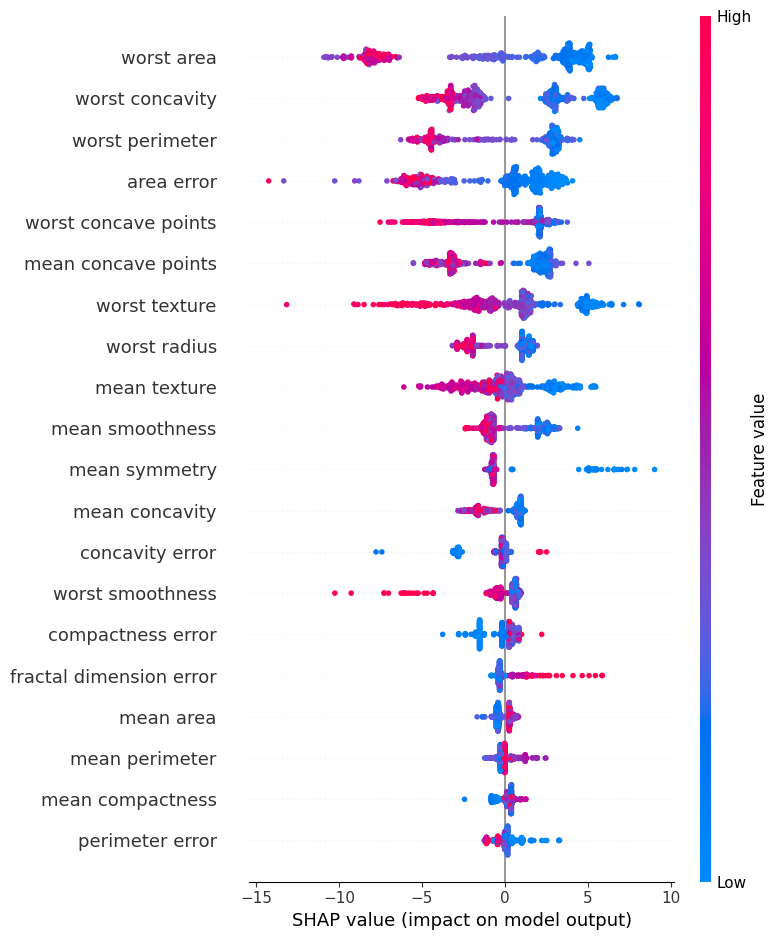

In [7]:
import shap
explainer = shap.TreeExplainer(clf) 
shap_values = explainer.shap_values(X) 
shap.summary_plot(shap_values,X) 

We can see that - for example - if the 
- worst area
- worst concavity
- worst perimeter

are small, the SHAP values are positive (-> they contribute to the model predicting 1 (benign - not so bad)), however, if they are large, the SHAP values are negative (-> they contribute to the model predicting 0 (malignant - bad))

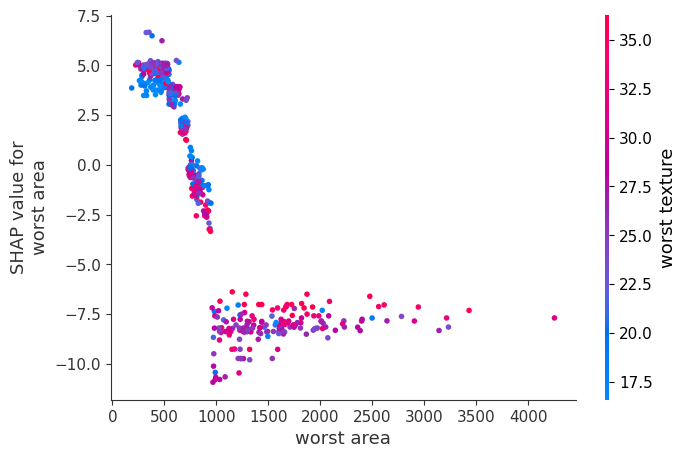

In [10]:
shap.dependence_plot("worst area", shap_values, X)

The most important model feature is "worst area", and it is highly nonlinearly related to the prediction. Increases of worst area at low values (~<1000) have a large influence on the model predicted class (malignant/benign). Once worst area reaches a size of ~1000, this feature always contributes similarly strongly to the model predicting "malignant". If the worst area is smaller than ~500, this feature contributes to the model predicting benign. Overall, the influence of worst area is not strongly dependent on other features (e.g. worst texture as shown here).

Click to add a cell.

